## Домашняя работа по построению моделей

Форма для ответов https://docs.google.com/forms/d/e/1FAIpQLScIwhugC9a-Htd8CzYkBFctEPyPlh8DG-1-n61tQjOujPyHUw/viewform?usp=sharing

In [1]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Классификация

Сгенерируем выборку данных

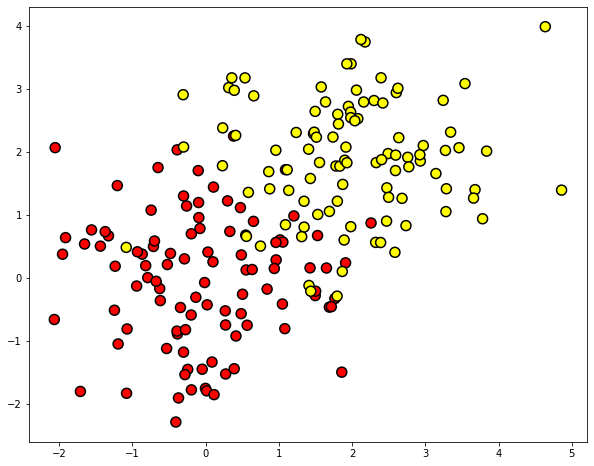

In [2]:
np.random.seed(7)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

In [3]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42, stratify=train_labels)

Обучение моделей без настройки параметров

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Обучите на тренировочной выборке дерево решений (DecisionTreeClassifier) максимальной глубины 3 и получите качество на тесте. Используйте параметр random_state = 42 для воспроизводимости результатов.

In [6]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
tree.fit(X_train, y_train)

accuracy_score(y_test,tree.predict(X_test))

0.875

Вопрос 1. Какова доля правильных ответов дерева решений на тестовой выборке при максимальной глубине дерева = 3 и random_state = 42?

Обучите на тренировочной выборке логистическую регрессию (LogisticRegression) без настройки параметров. Зафиксируйте random_state = 42.

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train) 

LogisticRegression(random_state=42)

In [9]:
accuracy_score(y_test,log_reg.predict(X_test))

0.95

Вопрос 2. Какую долю правильных ответов на тестовой выборке показала логистическая регрессия при random_state = 42?

## Настройка параметров

Обучите на обучающей выборке дерево решений (DecisionTreeClassifier, опять random_state = 42 ). Максимальную глубину настройте на кросс-валидации с помощью GridSearchCV. Проведите 3-кратную кросс-валидацию (разбиение на 3 фолда)

In [10]:
from sklearn.model_selection import GridSearchCV

In [12]:
tree2 = DecisionTreeClassifier(criterion='entropy', random_state=42)
parameters = {'max_depth':range(1,50,10)}
clf=GridSearchCV(tree2, parameters, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': range(1, 50, 10)})

In [13]:
clf.best_params_

{'max_depth': 11}

Вопрос 3. Какая глубина дает лучшее качество?

In [16]:
accuracy_score(y_test,clf.best_estimator_.predict(X_test))

0.85

Вопрос 4. Какая модель показала лучшее качество?

Поменяем распределение данных

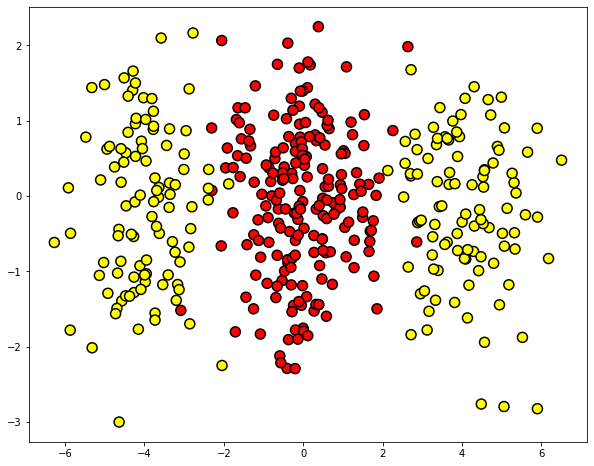

In [17]:
np.random.seed(7)
train_data = np.random.normal(size=(200, 2))
train_labels = np.zeros(200)

train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=(4,0))]
train_labels = np.r_[train_labels, np.ones(100)]
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=(-4,0))]
train_labels = np.r_[train_labels, np.ones(100)]
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42, stratify=train_labels)

Постройте дерево решений и логистическую регрессию. Подберите параметры с помощью GridserachCV (3 фолда).

In [19]:
lr = LogisticRegression(random_state=42)

grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
model_lr = GridSearchCV(lr, param_grid=grid_values, cv=3)
model_lr.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [20]:
accuracy_score(y_test,model_lr.best_estimator_.predict(X_test))

0.45

In [22]:
tree3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
parameters = {'max_depth':range(1,100,10)}
clf=GridSearchCV(tree3, parameters, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': range(1, 100, 10)})

In [23]:
accuracy_score(y_test,clf.best_estimator_.predict(X_test))

0.925

Вопрос 5. Какая модель даст лучшее качество на такой выборке?

# Регрессия

Возьмем датасет 400 людей с диабетом. В качестве целевой - количественный показатель прогресса болезни

In [24]:
from sklearn.datasets import load_diabetes

In [25]:
dataset = load_diabetes(as_frame=True)

In [26]:
X = dataset.data
y = dataset.target

In [27]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
y.shape

(442,)

In [ ]:
##   :Attribute Information:
##       - age     age in years
##       - sex
##       - bmi     body mass index
##       - bp      average blood pressure
##       - s1      tc, total serum cholesterol
##       - s2      ldl, low-density lipoproteins
##       - s3      hdl, high-density lipoproteins
##       - s4      tch, total cholesterol / HDL
##       - s5      ltg, possibly log of serum triglycerides level
##       - s6      glu, blood sugar level

Обучите линейную регрессию на всем датасете. Посчитайте качество метрикой MeanAbsoluteError.

In [28]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X, y)
predict_tree = linreg.predict(X)

In [29]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, predict_tree)

43.27739508374988

Вопрос 6. Какое качество получилось?

Попробуем поработать с кросс-валидацией. Обучите LinearRegression c помощью cross_validate на всей выборке на 5 фолдах. в качестве метрики укажите MSE и MAPE. Random state = 42.

In [39]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

metrics = ['neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
model = LinearRegression()
scores = cross_validate(model, X, y, cv=5, scoring=metrics)

mse_scores = scores['test_neg_mean_squared_error']
mape_scores = scores['test_neg_mean_absolute_percentage_error']

mse_scores.mean()


-2993.072943299886

In [40]:
mape_scores.mean()

-0.39486033589718633

Вопрос 7. С какой метрикой качество модели выше (Метрика меньше)? Считайте усредненное значение по всем фолдам.

# Многоклассовая классификация

## Применение TfidfVectorizer
TF-IDF (от англ. TF — term frequency, IDF — inverse document frequency) — статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Вес некоторого слова пропорционален количеству употребления этого слова в документе, и обратно пропорционален частоте употребления слова в других документах коллекции.

TfidfVectorizer преобразует тексты в матрицу TF-IDF признаков.

Основные параметры TfidfVectorizer в sklearn:

* min_df - при построении словаря слова, которые встречаются реже, чем указанное значение, игнорируются
* max_df - при построении словаря слова, которые встречаются чаще, чем указанное значение, игнорируются
* analyzer - определяет, строятся ли признаки по словам или по символам (буквам)
* ngram_range - определяет, формируются ли признаки только из отдельных слов или из нескольких слов (в случае с analyzer='char' задает количество символов). Например, если указать analyzer='word' и ngram_range=(1,3),то признаки будут формироваться из отдельных слов, из пар слов и из троек слов.
* stop_words - слова, которые игнорируются при построении матрицы

Делим выборку через train_test_split. Отделяем 20%

In [41]:
from sklearn.datasets import fetch_20newsgroups

In [42]:
newsgroups_train = fetch_20newsgroups(subset='train')

Отберем 3 класса

In [73]:
texts = fetch_20newsgroups(subset='train', 
                           categories=['comp.sys.mac.hardware', 
                                       'soc.religion.christian',
                                       'rec.sport.hockey'
                                        ])
dataset = texts.data
target = texts.target

Инициализируйте TfidfVectorizer с параметрами min_df=3, max_df=0.3 и ngram_range=(1, 3).
Примените метод fit_transform к X_train и метод transform к X_test

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset, target, test_size = 0.3, random_state = 42, shuffle=True, stratify=target)

Вопрос 8. Какой размер у полученного BagofWords?

In [64]:
#создаём векторизатор
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=3, max_df=0.3, ngram_range=(1, 3))
# фитимся
tfidf_X_train = tfidf_vectorizer.fit_transform(X_train)

feature_names = tfidf_vectorizer.get_feature_names()
df= pd.DataFrame(tfidf_X_train.toarray(),columns=feature_names)
df

,00,00 08,00 08 07,00 09,00 34,00 57,00 58,000,000 and,000 year,...,zone april,zone april 18,zone april 20,zone is,zones,zones april,zones april 18,zoom,zterm,zubov
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
tfidf_X_test = tfidf_vectorizer.transform(X_test)
feature_names = tfidf_vectorizer.get_feature_names()
df= pd.DataFrame(tfidf_X_test.toarray(),columns=feature_names)
df

,00,00 08,00 08 07,00 09,00 34,00 57,00 58,000,000 and,000 year,...,zone april,zone april 18,zone april 20,zone is,zones,zones april,zones april 18,zoom,zterm,zubov
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
feature_names.index('keyboard')

21407

Вопрос 9. Какой индекс у слова 'keyboard'?

Обучите логистическую регрессию с дефолтными параметрами, KNN с 100 соседями,
Случайный лес из 1000 деревьев.
Random state=42.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Вопрос 10.  Какая модель дает лучшее качество на кросс-валидации (cross_val_score(clf, matrix, y_train).mean())

In [67]:
from sklearn.model_selection import cross_val_score

In [83]:
print(cross_val_score(LogisticRegression(random_state=42), tfidf_X_test, Y_test).mean())

0.968136131193793


In [84]:
print(cross_val_score(KNeighborsClassifier(n_neighbors=1), tfidf_X_test, Y_test).mean())

0.91572914829836


In [85]:
print(cross_val_score(RandomForestClassifier(n_estimators=1000,random_state=42), tfidf_X_test, Y_test).mean())

0.9176159407511901
